<a href="https://colab.research.google.com/github/kunalpagarey/PyTocrh_Tutorial/blob/master/PyTorch_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt  # to create linearly separable dataset.

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, Y = datasets.make_blobs(n_features=n_pts, centers=centers, random_state=123, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(Y.reshape(100, 1))
def scatter_plot():
    plt.scatter(X[Y==0, 0], X[Y==0, 1])
    plt.scatter(X[Y==1, 0], X[Y==1, 1])

In [0]:
class LogisticRegression(nn.Module):
    def __init__(self, in_f, out_f):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_f, out_f)
        self.sigmoid = torch.sigmoid

    def forward(self, x):
        fc = self.linear(x)
        pred = self.sigmoid(fc)
        return pred
    
    def predict(self, pred):
        if pred >= 0.5:
            return 1
        else:
            return 0

In [46]:
torch.manual_seed(2)
model = LogisticRegression(x_data.shape[1], y_data.shape[1])
print(model)
print(list(model.parameters()))

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [47]:
W, B = model.parameters()
def get_params():
    return W[0][0].item(), W[0][1].item(), B[0].item()

get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fig(title):
    plt.title(title)
    w1, w2, b = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1 + b)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()

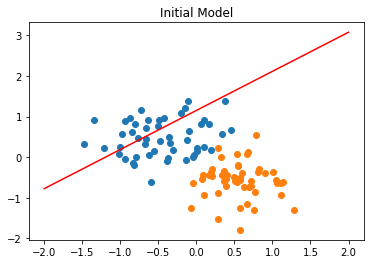

In [49]:
plot_fig("Initial Model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [51]:
epochs = 1000
losses = []

for e in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss)
    print("Epoch: {}, Loss: {}".format(e, loss.item()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 0.6185115575790405
Epoch: 1, Loss: 0.6174639463424683
Epoch: 2, Loss: 0.6164201498031616
Epoch: 3, Loss: 0.6153794527053833
Epoch: 4, Loss: 0.614342451095581
Epoch: 5, Loss: 0.6133086681365967
Epoch: 6, Loss: 0.6122783422470093
Epoch: 7, Loss: 0.6112515330314636
Epoch: 8, Loss: 0.6102280616760254
Epoch: 9, Loss: 0.6092080473899841
Epoch: 10, Loss: 0.6081910729408264
Epoch: 11, Loss: 0.6071775555610657
Epoch: 12, Loss: 0.606167733669281
Epoch: 13, Loss: 0.6051608920097351
Epoch: 14, Loss: 0.604157567024231
Epoch: 15, Loss: 0.6031574606895447
Epoch: 16, Loss: 0.602160632610321
Epoch: 17, Loss: 0.6011670827865601
Epoch: 18, Loss: 0.6001767516136169
Epoch: 19, Loss: 0.599189817905426
Epoch: 20, Loss: 0.5982059240341187
Epoch: 21, Loss: 0.5972254276275635
Epoch: 22, Loss: 0.5962479114532471
Epoch: 23, Loss: 0.5952739119529724
Epoch: 24, Loss: 0.5943028926849365
Epoch: 25, Loss: 0.5933352112770081
Epoch: 26, Loss: 0.5923705101013184
Epoch: 27, Loss: 0.5914090275764465
Epoch: 

Text(0, 0.5, 'Loss')

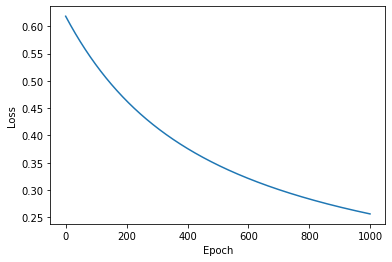

In [52]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

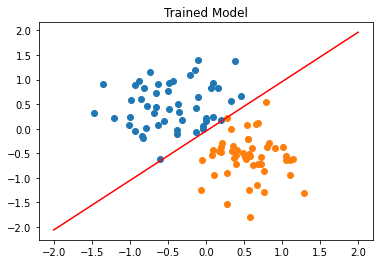

In [53]:
plot_fig("Trained Model")

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point :  1
Black point :  0


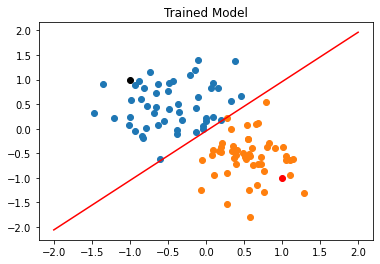

In [61]:
# Prediction

point1 = torch.Tensor([1, -1])
point2 = torch.Tensor([-1, 1])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fig("Trained Model")
p1_pred = model.forward(point1).item()
p2_pred = model.forward(point2).item()
print("Red point positive probability = {}".format(p1_pred)) 
print("Black point positive probability = {}".format(p2_pred))
print("Red point : ", model.predict(p1_pred))
print("Black point : ", model.predict(p2_pred))